# RNA-seq Analysis Notebook
---
## Introduction
This notebook contains a **guided walkthrough to building analysis simple of an RNA-seq dataset**. Over the course of the lecture, you will be required to write Python code in order to accomplish simple programming tasks.

## Overview
1. **<a href="#1">Load RNA-seq Dataset</a>**
2. **<a href="#2">Analyze Library Sizes</a>**
3. **<a href="#3">Analyze Gene Expression Levels</a>**
4. **<a href="#4">Normalize Expression Data</a>**
5. **<a href="#5">View Normalized Data</a>**

---

# Lecture I
### Load Scripts
First, we import some useful Python libraries and analysis scripts used to perform the analysis:
* **pandas** (pd)
* **numpy** (np)
* **seaborn** (sns)
* **scipy.stats** (ss)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss

---
<span id="1"></span>
# 1. Load RNA-seq Dataset
## Overview
Here we load the RNA-seq dataset, which consists of two files:
 * **readcounts.txt**, which contains the raw expression data for genes
 * **sample_metadata.txt**, which contains information about the samples (e.g. experimental conditions)
 
## Steps
1. Load the files in the Jupyter Environment with `pd.read_table()`.
    1. Save *readcounts.txt* in a variable called `readcount_dataframe`; using `index_col="ID_REF"`.
    2. Save *sample_metadata.txt* in a variable called `sample_metadata_dataframe`; using `index_col="sample_geo_accession"`.
3. After the files have been loaded in a DataFrame, preview them using the `dataframe.head()` method.

*Tip*: for more information about the `pd.read_table` function, try using `help(pd.read_table)` or read the [official documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html).

In [2]:
# Load readcounts.txt
readcount_dataframe = pd.read_table('readcounts.txt', index_col='ID_REF')

# Preview readcount_dataframe
readcount_dataframe.head()

,GSM1858934,GSM1858935,GSM1858936,GSM1858937,GSM1858938,GSM1858939,GSM1858940,GSM1858941,GSM1858942,GSM1858943,GSM1858944,GSM1858945,GSM1858946,GSM1858947,GSM1858948,GSM1858949,GSM1858950,GSM1858951
ID_REF,,,,,,,,,,,,,,,,,,
A1BG,350,316,228,252,428,403,208,222,287,305,267,284,224,255,194,232,269,247
A1CF,10,9,4,1,11,11,6,11,10,8,1,1,7,2,3,5,6,6
A2M,0,1,1,1,1,3,4,2,0,2,0,0,0,0,0,1,2,6
A2ML1,8,6,2,2,13,12,11,14,8,7,4,4,6,6,2,2,2,11
A2MP1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
# Load sample_metadata.txt
sample_metadata_dataframe = pd.read_table('sample_metadata.txt', index_col='sample_geo_accession')

# Preview sample_metadata_dataframe
sample_metadata_dataframe

,sample_title,cell_line,sgrna,treatment
sample_geo_accession,,,,
GSM1858934,sgLTR-F2-A-L1,LChIT clone 3.2,LTR362,None
GSM1858935,sgLTR-F2-A-L2,LChIT clone 3.2,LTR362,None
GSM1858936,sgLTR-F2-B-L1,LChIT clone 3.2,LTR362,None
GSM1858937,sgLTR-F2-B-L2,LChIT clone 3.2,LTR362,None
GSM1858938,sgLTR-F2-C-L1,LChIT clone 3.2,LTR362,None
GSM1858939,sgLTR-F2-C-L2,LChIT clone 3.2,LTR362,None
GSM1858940,sgRNA-Control-A-L1,LChIT clone 3.2,Control,None
GSM1858941,sgRNA-Control-A-L2,LChIT clone 3.2,Control,None
GSM1858942,sgRNA-Control-B-L1,LChIT clone 3.2,Control,None


---
<span id="2"></span>
# 2. Analyze Library Sizes
## Overview
Due to several confounding factors, such as random variations in the amount of RNA collected in each sample prior to sequencing, RNA-seq samples often have different amounts of total mapped reads.

Here, we calculate the amount of mapped reads for each sample and plot the results using a bar chart.

## Steps
1. Calculate the library sizes (i.e. sum of columns in the DataFrame) using the `dataframe.sum()` method ([official documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)).
2. Save the results in the `library_sizes` variable.
3. Plot the `library_sizes` variable using `sns.barplot` ([official documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)).
    * Set `library_sizes.values` on the X axis
    * Set `library_sizes.index` on the Y axis

In [4]:
# Calculate library sizes
library_sizes = readcount_dataframe.sum()

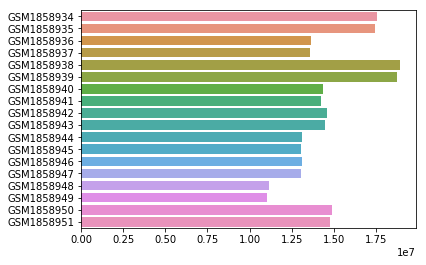

In [5]:
# Plot library sizes
sns.barplot(x=library_sizes.values, y=library_sizes.index);

---
<span id="3"></span>
# 3. Analyze Gene Expression Levels
### Overview
Gene expression in RNA-seq datasets is highly variable and not normally distributed, with average gene expression levels typically ranging between tens to millions of counts for different genes.

Here, we visualize this by calculating the mean gene expression level for each gene and plotting it using a histogram.

### Coding Steps
1. Calculate the mean expression of genes (i.e. median of rows in the DataFrame) using the `dataframe.mean()` method ([official documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)).
2. Save the results in the `mean_gene_expression` variable.
3. Plot the `mean_gene_expression` variable using `sns.distplot` ([official documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)).
4. Calculate log10-expression values using `numpy.log10`.
5. Repeat steps 2 and 3 with the log-transformed data.

In [26]:
# Calculate median gene expression
mean_gene_expression = readcount_dataframe.mean(axis=1)

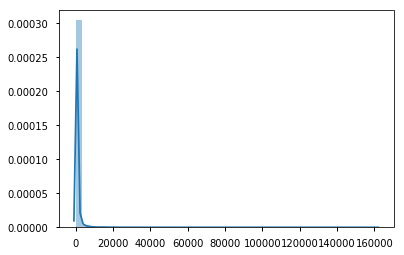

In [27]:
# Plot median gene expression
sns.distplot(mean_gene_expression);

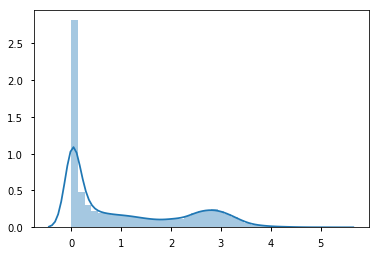

In [28]:
# Plot median gene expression
sns.distplot(np.log10(mean_gene_expression+1));

---
<span id="4"></span>
# 4. Normalize Expression Data
## Overview
Due to the high variation in read counts across samples and within genes of the same samples, normalization is required in order to perform an effective analysis of RNA-seq datasets.

Here we perform a simple data normalization, which consists of three steps:
1. *Normalize the columns (samples)*, by dividing each sample by the total number of mapped reads
2. *Reduce the dynamic range* of the dataset, by performing a log10-transformation of values
3. *Normalize the rows (genes)*, by performing a Z-score transformation

## Steps
1. Divide the `readcount_dataframe` by the library sizes. Save the result in `col_normalized_dataframe`.
2. Log-transform the result using `np.log10(x+1)`. Save the result in `log_normalized_dataframe`.
3. Apply a Z-score normalization on the result using the `dataframe.apply()` method ([official documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)) and the `ss.zscore()` function ([official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)). Save the result in `zscore_dataframe`.

In [9]:
# Divide by library sizes
col_normalized_dataframe = readcount_dataframe/library_sizes.values

# Preview
col_normalized_dataframe.head()

,GSM1858934,GSM1858935,GSM1858936,GSM1858937,GSM1858938,GSM1858939,GSM1858940,GSM1858941,GSM1858942,GSM1858943,GSM1858944,GSM1858945,GSM1858946,GSM1858947,GSM1858948,GSM1858949,GSM1858950,GSM1858951
ID_REF,,,,,,,,,,,,,,,,,,
A1BG,1.990669e-05,1.808015e-05,1.670641e-05,1.857165e-05,2.260166e-05,2.145613e-05,1.449636e-05,1.556159e-05,1.969334e-05,2.109384e-05,2.035816e-05,2.178109e-05,1.705235e-05,1.954420e-05,1.735182e-05,2.099851e-05,1.806279e-05,1.669301e-05
A1CF,5.687627e-07,5.149410e-07,2.930949e-07,7.369703e-08,5.808837e-07,5.856512e-07,4.181642e-07,7.710699e-07,6.861791e-07,5.532811e-07,7.624781e-08,7.669396e-08,5.328860e-07,1.532879e-07,2.683271e-07,4.525541e-07,4.028876e-07,4.054983e-07
A2M,0.000000e+00,5.721566e-08,7.327373e-08,7.369703e-08,5.280761e-08,1.597231e-07,2.787761e-07,1.401945e-07,0.000000e+00,1.383203e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.051083e-08,1.342959e-07,4.054983e-07
A2ML1,4.550102e-07,3.432940e-07,1.465475e-07,1.473941e-07,6.864989e-07,6.388922e-07,7.666344e-07,9.813616e-07,5.489433e-07,4.841210e-07,3.049912e-07,3.067759e-07,4.567594e-07,4.598636e-07,1.788847e-07,1.810217e-07,1.342959e-07,7.434135e-07
A2MP1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.758305e-08


In [10]:
# Perform Z-score
zscore_dataframe = col_normalized_dataframe.apply(ss.zscore, axis=1)

# Preview
zscore_dataframe.head()

/Users/maayanlab/Documents/Computation/python3-venv/lib/python3.6/site-packages/scipy/stats/stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,GSM1858934,GSM1858935,GSM1858936,GSM1858937,GSM1858938,GSM1858939,GSM1858940,GSM1858941,GSM1858942,GSM1858943,GSM1858944,GSM1858945,GSM1858946,GSM1858947,GSM1858948,GSM1858949,GSM1858950,GSM1858951
ID_REF,,,,,,,,,,,,,,,,,,
A1BG,0.456339,-0.363040,-0.979292,-0.142555,1.665284,1.151408,-1.970709,-1.492852,0.360629,0.988888,0.658866,1.297181,-0.824104,0.293728,-0.689764,0.946122,-0.370826,-0.985302
A1CF,0.755676,0.496402,-0.572292,-1.629193,0.814066,0.837033,0.030201,1.730246,1.321304,0.681097,-1.616906,-1.614756,0.582848,-1.245782,-0.691606,0.195867,-0.043391,-0.030814
A2M,-0.832045,-0.297917,-0.148010,-0.144058,-0.339068,0.659025,1.770426,0.476719,-0.832045,0.459222,-0.832045,-0.832045,-0.832045,-0.832045,-0.832045,0.012904,0.421653,2.953421
A2ML1,0.051803,-0.410193,-1.223828,-1.220326,1.009112,0.812238,1.340509,2.228501,0.440259,0.172190,-0.568592,-0.561212,0.059037,0.071875,-1.090098,-1.081261,-1.274493,1.244480
A2MP1,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,-0.242536,4.123106


---
<span id="5"></span>
# 5. View Normalized Data
## Overview
After performing data normalization, it is useful to explore how the process has changed the values in the dataset.

Here we plot a histogram of the mean expression levels of each genes, similarly to (3).

## Steps
1. Plot the mean gene expression levels as in (3).

*Note*: remember to change the variable name from `readcount_dataframe` to `zscore_dataframe`.

In [29]:
# Calculate median gene expression
mean_gene_expression = zscore_dataframe.mean(axis=1)

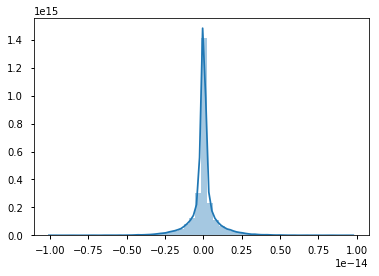

In [30]:
# Plot median gene expression
sns.distplot(mean_gene_expression.dropna());